In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# from sklearn.datasets import load_boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"

**ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.<br>
**INDUS:** proportion of non-retail business acres per town<br>
**CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
**NOX:** nitric oxides concentration (parts per 10 million)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124<br>
**RM:** average number of rooms per dwelling<br>
**AGE:** proportion of owner-occupied units built prior to 1940<br>
**DIS:** weighted distances to ﬁve Boston employment centers<br>
**RAD:** index of accessibility to radial highways<br>
**TAX:** full-value property-tax rate per 10,000<br>
**PTRATIO:** pupil-teacher ratio by town 12. <br>**B:** 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population<br>
**MEDV:** Median value of owner-occupied homes in $1000s<br>
We can see that the input attributes have a mixture of units.

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv("housing.csv", delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [6]:
# Summarizing the stats of the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
### Exploratory Data Analysis
## Correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


The closer to +1 are highly coorelated<br>
We have to find the coorelation between dependent and independent features and if it is highly coorelated between independent features then we can remove one of the independent feature(multicolinearity)

In [8]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

The crim and medv(price) are inversly related as the crime rate increases then the price will be decreased as shown from the coorelation(-0.388305)


Text(0, 0.5, 'Price')

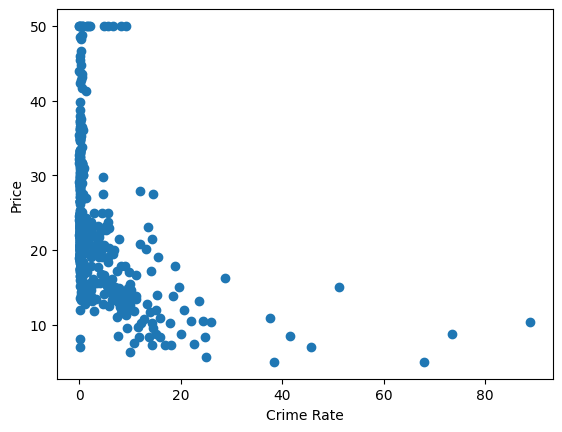

In [9]:
plt.scatter(df['CRIM'],df['MEDV'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

so the when the crime is less then the above plot shows the higher in the price of house.

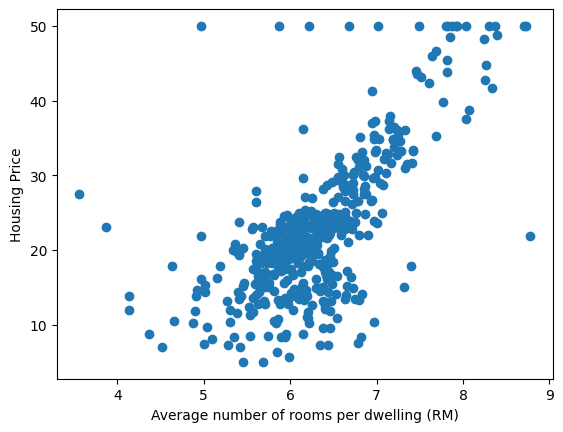

In [10]:
## RM(room) vs MEDV(price) are directly related as the number of rooms increases
## the price will eventually increases
plt.scatter(df["RM"], df["MEDV"])
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.show()

<Axes: xlabel='RM', ylabel='MEDV'>

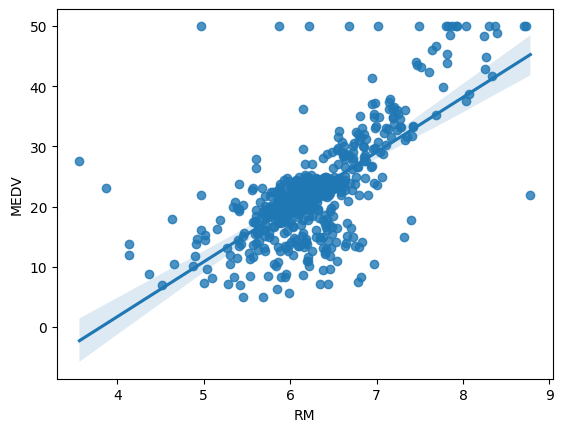

In [11]:
## regression plot
sns.regplot(x="RM", y="MEDV", data=df)

get a linear regression line

<Axes: xlabel='LSTAT', ylabel='MEDV'>

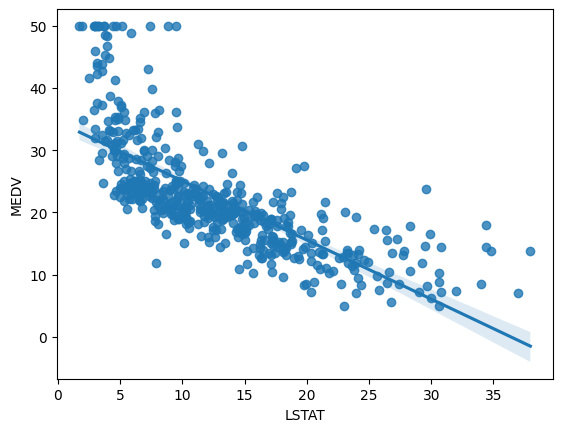

In [12]:
sns.regplot(x="LSTAT", y="MEDV", data=df)

negatively coorelated

<Axes: xlabel='CHAS', ylabel='MEDV'>

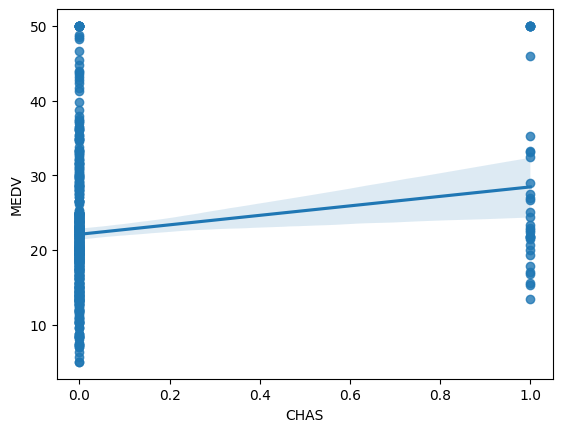

In [13]:
sns.regplot(x="CHAS", y="MEDV", data=df)

no linearity(where x is increasing and y is decreasing or any kind of relationship) in this(hardly coorelated)

In [14]:
# Dependent and independent feature
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [16]:
y.head()


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [19]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666.0,20.2,100.19,16.22


In [20]:
y_train

,MEDV
5,28.7
116,21.2
45,19.3
16,23.1
468,19.1
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [21]:
y_test

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
441,17.1
23,14.5
225,50.0
433,14.3


In [22]:
# Standardized the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

In [25]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

Why do the standardized in the linear regression?<br>
Internally we use gradient descent our main aim is to come to the global minima and to come to the global minima we have to make sure that all our idependent feature units are in the same scale, because of that the conversion will happen quickly.

**Model Training**

In [26]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [27]:
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
# print the coefficient and the intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [29]:
print(regression.intercept_)

23.01581920903955


In [30]:
# On what parameter the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [31]:
# Prediction with the test data
reg_pred=regression.predict(X_test)

In [32]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

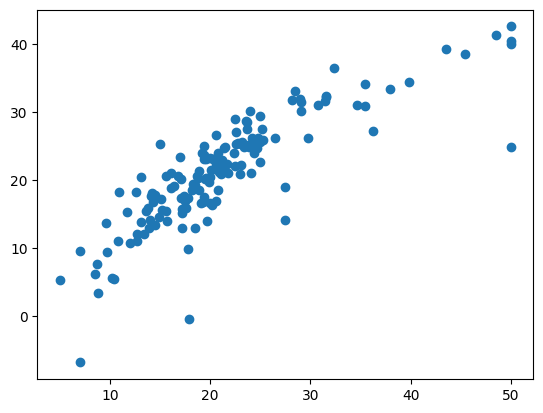

In [33]:
# plot the scatter plot for the prediction
plt.scatter(y_test,reg_pred)

we are getting a linear this means that are project work well

In [34]:
# residuals(is the error with respect to ytest and regpredict)
residuals=y_test-reg_pred

In [35]:
residuals

,MEDV
173,-5.048960
274,-4.095014
491,-1.811193
72,-2.603213
452,-2.755280
...,...
441,-0.303672
23,1.114059
225,10.016575
433,-2.382863


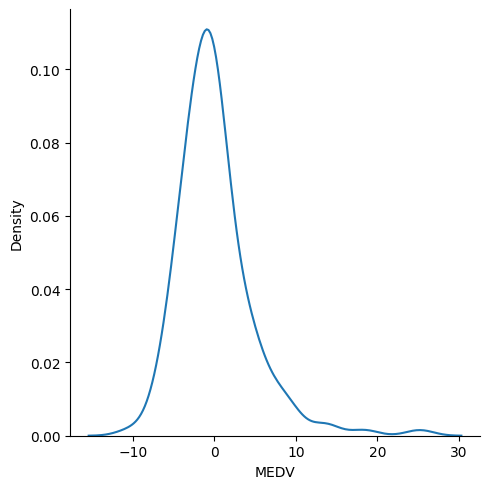

In [36]:
# plot the residuals
sns.displot(residuals,kind="kde")

getting a normal distribution so the model work well


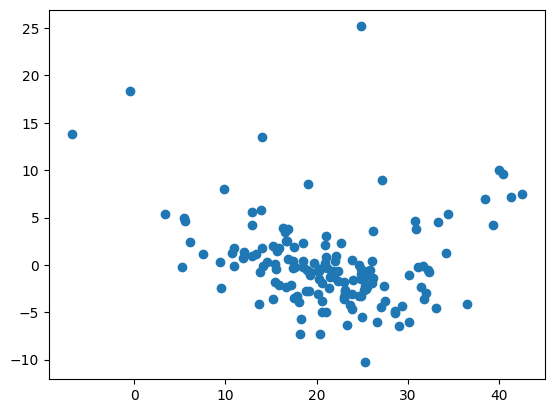

In [37]:
# Scatter plot with respect to prediction and residual
# uniform distribution
plt.scatter(reg_pred,residuals)

In [38]:
# Performance metrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574053
21.51744423117721
4.6386899261728205


**R square**

Formula:<br><br>
**R^2=1-SSR/SST**<br>
where<br>
R^2 = Coefficient of determination<br>
SSR = Sum of square of residuals<br>
SST = Total sum of squares

In [39]:
# R square and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7112260057484932


**Adjusted R square**

Formula:<br><br>
**R^2=1-[(1-R^2)*(n-1)/(n-k-1)]**<br>
where<br>
R^2 = Coefficient of determination<br>
n = Number of observation<br>
k = Number of predictor variables

In [40]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-1-X_test.shape[1])

0.6840226584639308

adjusted R^2 is always less than R^2

**New data prediction**

In [41]:
df.shape

(506, 14)

In [42]:
ans=df.iloc[:,:-1]
ans.shape

(506, 13)

In [45]:
ans.iloc[[0]].values.reshape(1,-1).shape

(1, 13)

In [46]:
regression.predict(ans.iloc[[0]].values.reshape(1,-1))

array([-45.64344024])

we get the negative value because we forget to do the standarization

In [47]:
regression.predict(scaler.transform(ans.iloc[[0]].values.reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

**Pickling the model file for deployment**

In [48]:
import pickle

In [49]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [50]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [51]:
pickled_model.predict(scaler.transform(ans.iloc[[0]].values.reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])